# K-Means Clustering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

In [2]:
df = pd.read_csv("E:\\Datas\\TSNE_data.csv")
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
df.shape

(569, 31)

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### We can see that the dataset doesn't contain any missing values which implies it is clean

In [6]:
# Extract features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

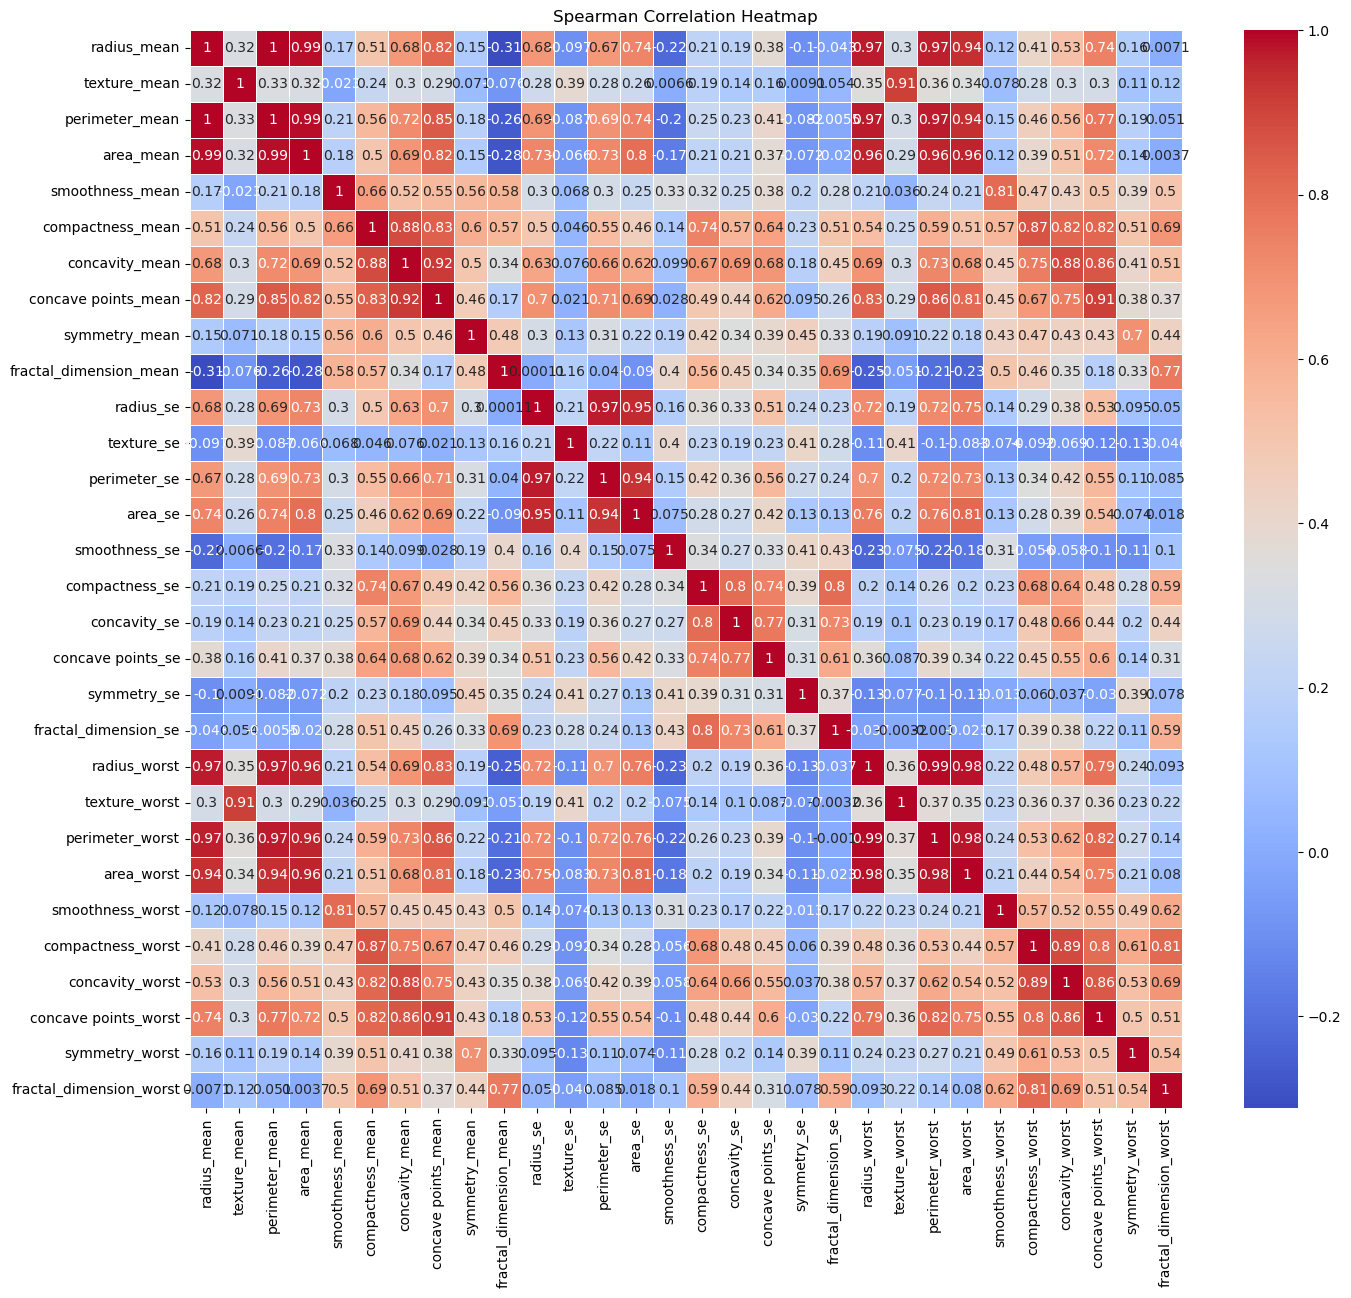

In [7]:
plt.figure(figsize=(16, 14))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

### From the heatmap we can see that there is a slightly moderate amount of positive correlation between the features which suggests that the dataset is moderately linear

In [8]:
# Apply Label encoding to the target variables which is categorical.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

### Applying PCA and t-SNE and Fitting a K-Means model to compare both the methods

In [11]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

In [12]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_standardized)
X_test_tsne = tsne.fit_transform(X_test_standardized)

In [13]:
# Apply K-Means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
y_pred_pca = kmeans_pca.fit_predict(X_train_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
# Apply K-Means clustering on t-SNE-transformed data
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
y_pred_tsne = kmeans_tsne.fit_predict(X_train_tsne)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
# Calculate silhouette scores for both the methods.
silhouette_score_pca = silhouette_score(X_train_pca, y_pred_pca)
silhouette_score_tsne = silhouette_score(X_train_tsne, y_pred_tsne)

print(f'Silhouette Score with K-Means on PCA: {silhouette_score_pca:.4f}')
print(f'Silhouette Score with K-Means on t-SNE: {silhouette_score_tsne:.4f}')

Silhouette Score with K-Means on PCA: 0.5077
Silhouette Score with K-Means on t-SNE: 0.5020


### The silhouette score for both PCA and t-SNE methods are similar but using t-SNE we get more score. Let's further check which method is best suited for the dataset. 

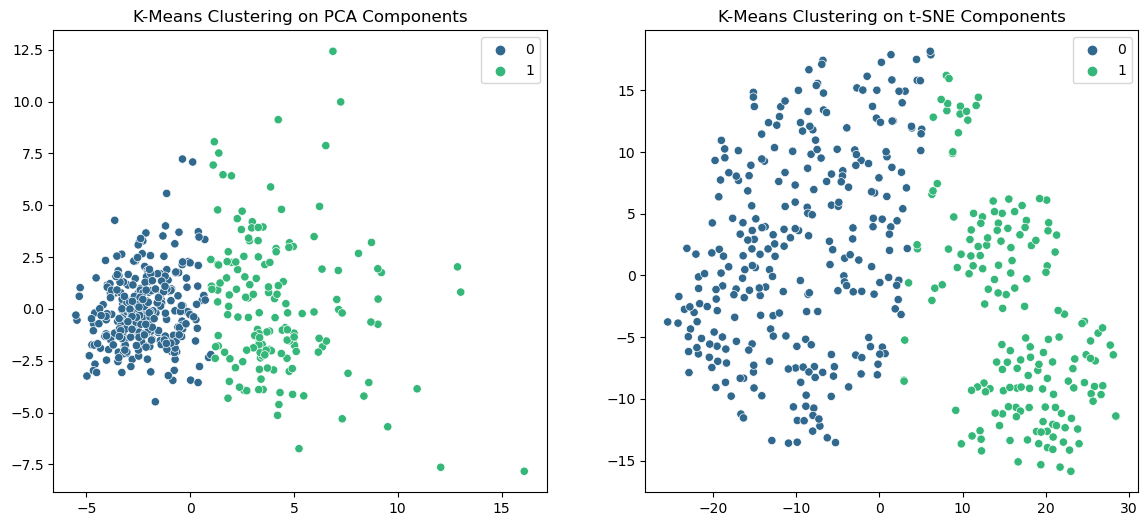

In [16]:
# Visualize clustering results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_pred_pca, palette='viridis')
plt.title('K-Means Clustering on PCA Components')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_pred_tsne, palette='viridis')
plt.title('K-Means Clustering on t-SNE Components')

plt.show()

In [17]:
# Calculate accuracy for clustering (using majority voting)
accuracy_pca = accuracy_score(y_train, y_pred_pca)
accuracy_tsne = accuracy_score(y_train, y_pred_tsne)

# Display accuracy scores
print(f'Accuracy with K-Means on PCA: {accuracy_pca:.4f}')
print(f'Accuracy with K-Means on t-SNE: {accuracy_tsne:.4f}')

Accuracy with K-Means on PCA: 0.8989
Accuracy with K-Means on t-SNE: 0.9209


### By analysing the accuracy score and the visualizations we can see that using t-SNE we get clear clustering and accurate results compared to PCA. 

### I conclude that t-SNE method is best suited for this dataset to get accurate results.